# Praktikum Mandiri | Pertemuan 06 | Support Vector Machine (SVM)

**Nama: Reva Aulia Faradilah**

**NIM: 0110222145**

**Kelas: ML Pagi - 2022**

---

**Tugas06**

# 1. Loading Dataset

**Import Library**

In [1]:
# Import Library
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # Untuk plot 3D

**Membaca file CSV**

In [2]:
# Menghubungkan colaboratory dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')
import os

# Memanggil dataset melalui gdrive
path = "gdrive/MyDrive/MachineLearning/praktikum06/data/"

# Membaca file csv
df = pd.read_csv(path + 'BankNote_Authentication.csv')
df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


**Menampilkan informasi detail dengan df.info()**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


**Menampilkan statistika deskriptif dari dataset**

In [4]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


# 2. Cek Target & Distribusi Kelas

In [5]:
target_col = 'class'
print("Nilai unik target:", df[target_col].unique())
print("\nDistribusi kelas:\n", df[target_col].value_counts())

Nilai unik target: [0 1]

Distribusi kelas:
 class
0    762
1    610
Name: count, dtype: int64


# 3. Cek Missing Value

In [6]:
print(df.isnull().sum())

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64


# 4. Pemilihan Fitur (X) & Label (y)

In [7]:
# Pemilihan Fitur (X) & Label (y)
X = df.drop('class', axis=1)
y = df['class']

# 5. Normalisasi dan Split Data

In [8]:
# Normalisasi dan Split Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Data train:", X_train.shape)
print("Data test:", X_test.shape)

Data train: (1097, 4)
Data test: (275, 4)


# 6. Bangun Model SVM (kernel='linear')

In [9]:
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)
model


SVC(kernel='linear', random_state=42)

# 7. Evaluasi Akurasi & Classification Report

In [10]:
y_pred = model.predict(X_test)
print(f"Akurasi: {accuracy_score(y_test, y_pred)*100:.2f}%\n")
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred, digits=4))

Akurasi: 97.45%

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0     1.0000    0.9542    0.9766       153
           1     0.9457    1.0000    0.9721       122

    accuracy                         0.9745       275
   macro avg     0.9729    0.9771    0.9744       275
weighted avg     0.9759    0.9745    0.9746       275



# 8. Confusion Matrix (Heatmap)

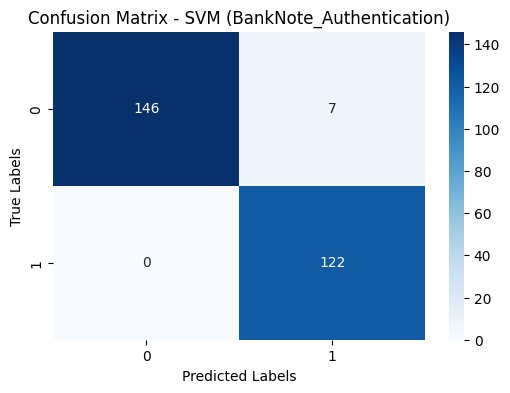

In [11]:
# Confusion Matrix (Heatmap)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM (BankNote_Authentication)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 9. Visualisasi 2D (Scatter)

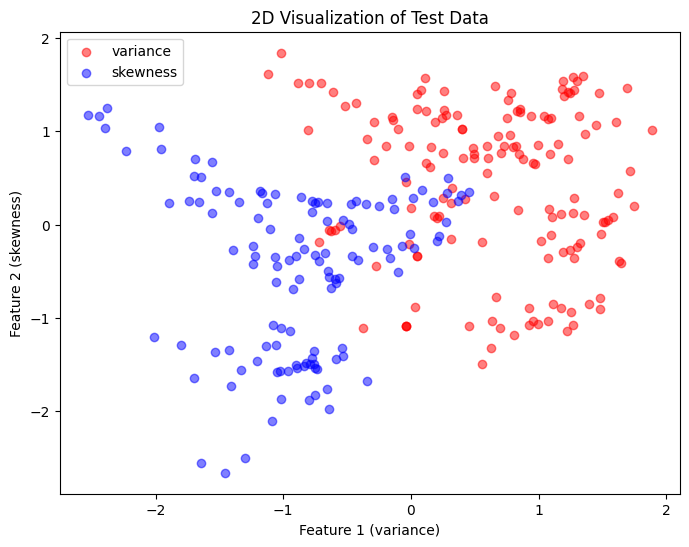

In [12]:
# Visualisasi 2D (Scatter)
# Ambil 2 fitur pertama untuk visualisasi
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

plt.figure(figsize=(8,6))
plt.scatter(X_test_2d[y_test==0][:,0], X_test_2d[y_test==0][:,1], color='red', label='variance', alpha=0.5)
plt.scatter(X_test_2d[y_test==1][:,0], X_test_2d[y_test==1][:,1], color='blue', label='skewness', alpha=0.5)
plt.xlabel('Feature 1 (variance)')
plt.ylabel('Feature 2 (skewness)')
plt.title('2D Visualization of Test Data')
plt.legend()
plt.show()

# 10. 3D Visualisasi Hasil Model

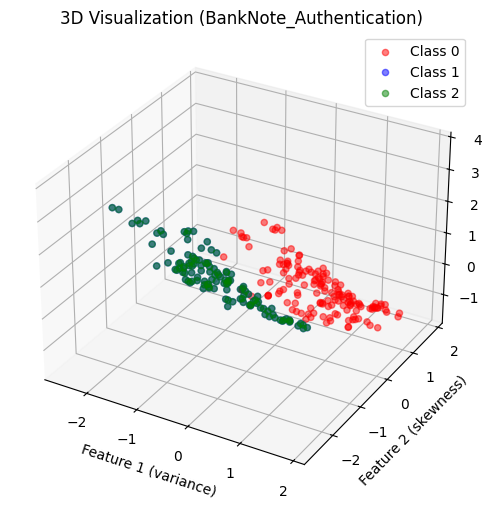

In [13]:
# 3D Visualisasi Hasil Model, pilih 3 fitur untuk 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

X_test_3d = X_test[:, :3]
ax.scatter(X_test_3d[y_test==0][:,0], X_test_3d[y_test==0][:,1], X_test_3d[y_test==0][:,2], c='red', label='Class 0', alpha=0.5)
ax.scatter(X_test_3d[y_test==1][:,0], X_test_3d[y_test==1][:,1], X_test_3d[y_test==1][:,2], c='blue', label='Class 1', alpha=0.5)
ax.scatter(X_test_3d[y_test==1][:,0], X_test_3d[y_test==1][:,1], X_test_3d[y_test==1][:,2], c='green', label='Class 2', alpha=0.5)

ax.set_xlabel('Feature 1 (variance)')
ax.set_ylabel('Feature 2 (skewness)')
ax.set_zlabel('Feature 3 (curtosis)')
ax.set_title('3D Visualization (BankNote_Authentication)')
ax.legend()
plt.show()
